## <center> Krutika Ambavane</center>

### <center> Prediction of mpg for a vehicle using Linear Regression </center>

<div class="alert alert-block alert-info"> <b>Importing all the required libraries </div>

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
import plotly.plotly as py
from plotly.graph_objs import *
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.formula.api as smf
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from sklearn.preprocessing import PolynomialFeatures

Populating the interactive namespace from numpy and matplotlib


In [142]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-info"> <b>Reading the file</b> </div>

In [143]:
df = pd.read_csv("Auto.csv", encoding = 'latin-1')

In [144]:
df.shape

(392, 9)

In [145]:
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


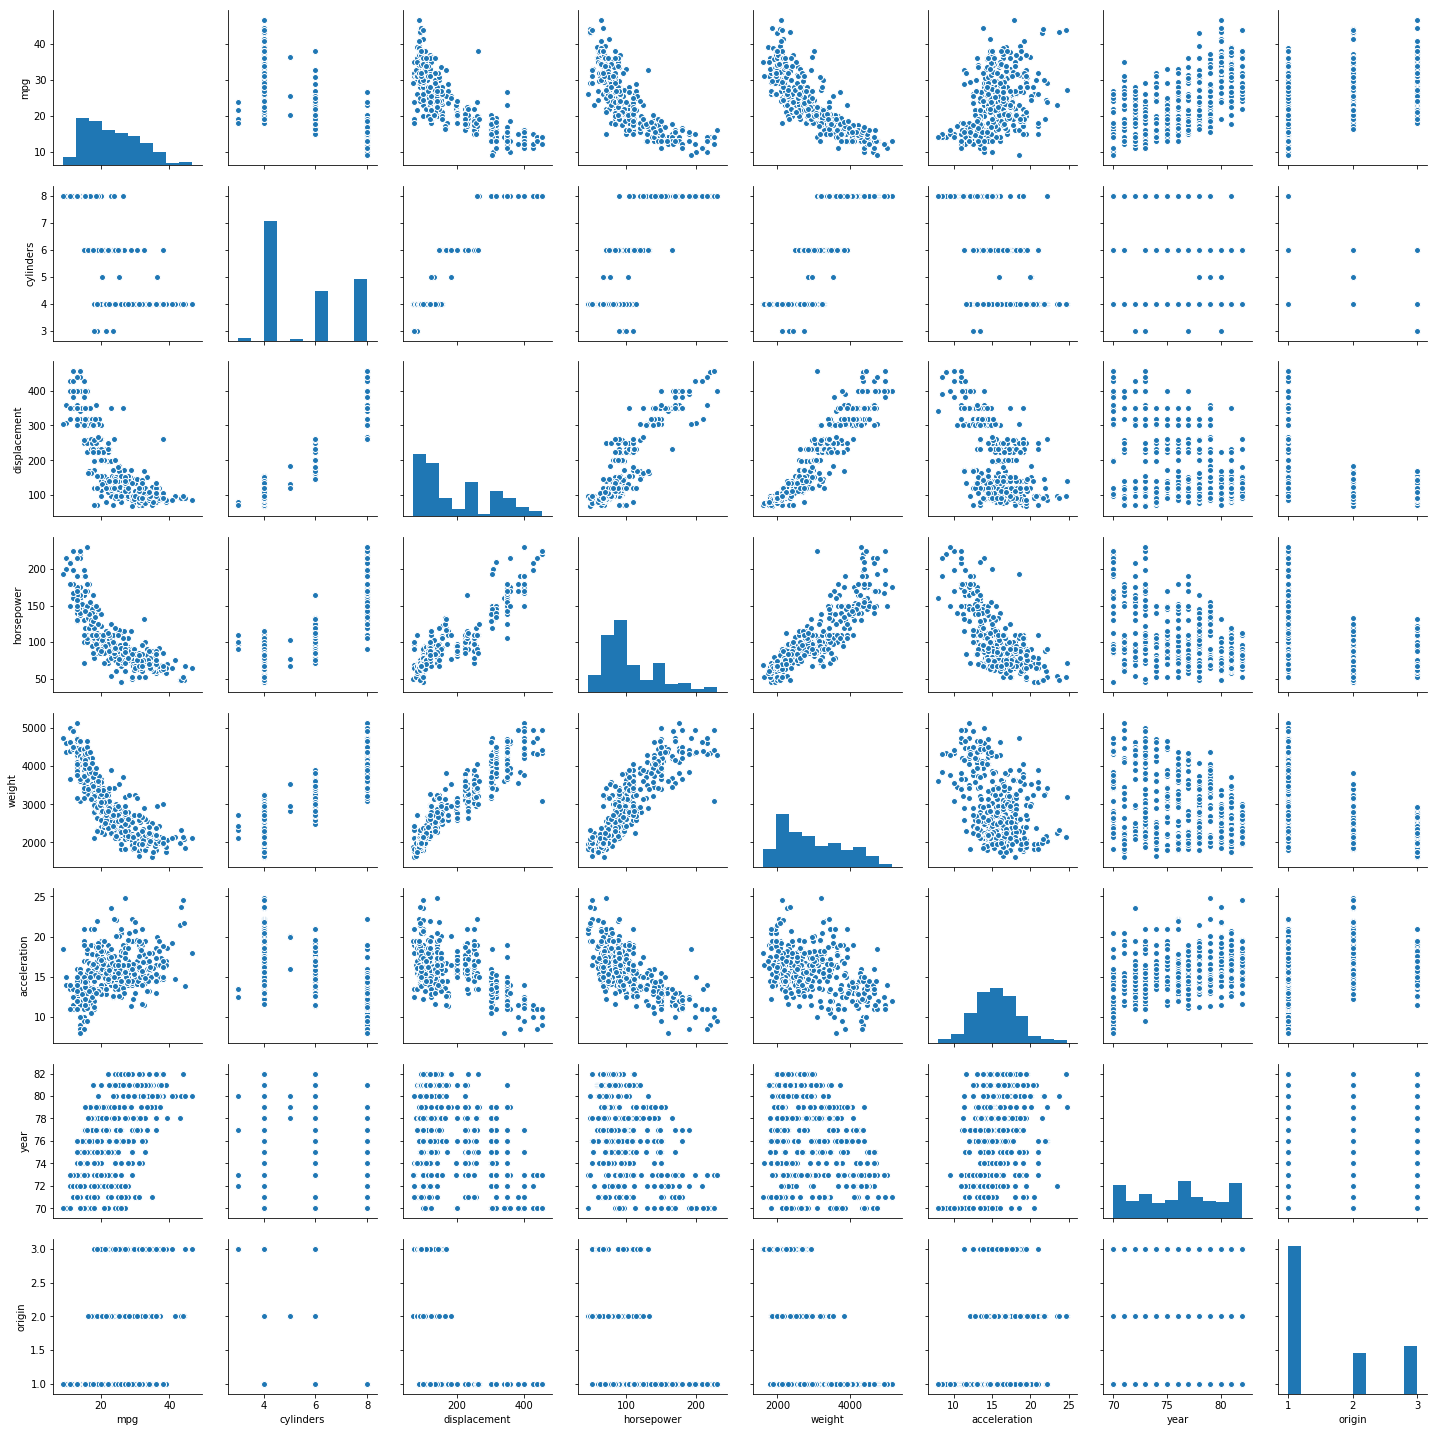

In [7]:
sns.pairplot(df)

### Correlation Matrix:

In [146]:
df_n = df.drop(['name'],axis=1) # excluding the 'name' column
df_n.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


#### Checking for null values

In [147]:
df.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

### Multiple Linear Regression:

In [148]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [149]:
X = df.drop(['name','mpg'], axis=1)
y = df['mpg']

lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
predictions = lm.predict(X)

<b> Finding the R-square value: The variance explained by our model

In [151]:
lm.score(X,y)

0.8214780764810597

In [152]:
np.sqrt(mean_squared_error(y,predictions))

3.293551418302203

<div class="alert alert-block alert-info"> <b>Now, using statsmodel:</b> </div>

In [153]:
modelstats = sm.OLS(y, sm.add_constant(X)).fit()

In [154]:
modelstats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          2.04e-139
Time:                        15:42:48   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There is a relationship between the predictors and the response. This is proven by the high R-squared value and high F-statistics. So, we can reject the null hypothesis that none of these variables help predict the outcome. However, some predictors do not have a statistically significant effect on the response. R-squared value indicates that about 82% of the variance in the response is captured by our model and can be explained by the predictors.


Displacement, weight, year, origin have a statistically significant relationship to the response.
Because their P>|t| values are lower than 0.05. This shows that they are statistically significant.

<div class="alert alert-block alert-info"> <b>Diagnostic Plots </b> </div>

#### Residual vs Fitted

In [155]:
dataframe = pd.concat([X, y], axis=1)

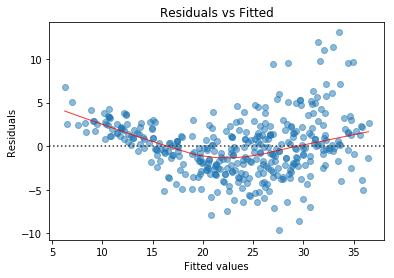

In [156]:
# model values
model_fitted_y = modelstats.fittedvalues
# model residuals
model_residuals = modelstats.resid
# normalized residuals
model_norm_residuals = modelstats.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = modelstats.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = modelstats.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

#### Normal QQ Plot

Text(0.5,1,'Normal Q-Q')

Text(0.5,0,'Theoretical Quantiles')

Text(0,0.5,'Standardized Residuals')

Text(2.80134,3.95189,'320')

Text(2.56972,3.63107,'324')

Text(2.42598,3.44489,'323')

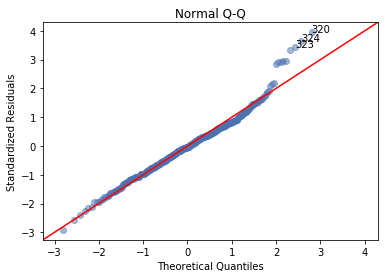

In [157]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

#### Scale Location

Text(0.5,1,'Scale-Location')

Text(0.5,0,'Fitted values')

Text(0,0.5,'$\\sqrt{|Standardized Residuals|}$')

Text(33.5396,1.98794,'320')

Text(31.4919,1.90554,'324')

Text(32.9492,1.85604,'323')

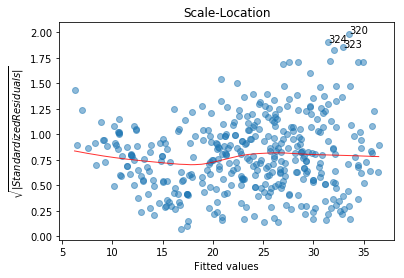

In [158]:
plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));

#### Residuals vs Leverage

(0, 0.19991288602615903)

(-3, 5)

Text(0.5,1,'Residuals vs Leverage')

Text(0.5,0,'Leverage')

Text(0,0.5,'Standardized Residuals')

Text(0.189913,-1.62939,'13')

Text(0.0491718,2.93865,'388')

Text(0.0287427,3.63107,'324')

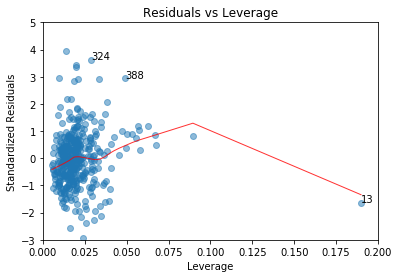

In [159]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');


leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

<div class="alert alert-block alert-success">
The diagnostic plots show some problems with the fit. The residuals vs fitted values graph has a 'U' shape. This tells that the residuals of small and high values tend to be positive while the residuals of those values in the middle are usually negative. Thus the first graph shows that there is a non-linear relationship between the responce and the predictors.

The diagnostic plots further show few outliers, the most substantial outlier being with a standaridized residual of 4. Point 13 is can be a leverage point that does not seem to be an outlier based on its standardized residual, but has very high leverage.

The graphs shows that the residuals are normally distributed and right skewed.
</div>

### Fitting the linear regression model with interaction effects and checking if any interactions appear to be statistically significant:

<div class="alert alert-block alert-info"> <b>Iteration 1: </b> <div>

In [160]:
regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     332.9
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          8.98e-159
Time:                        15:42:51   Log-Likelihood:                -977.87
No. Observations:                 392   AIC:                             1972.
Df Residuals:                     384   BIC:                             2004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -3.9950      3.892     -1.027      0.305     -11.647       3.657
cylinders               0.1071      0.294      0.365      0.716      -0.471       0.685
displacement           -0.0690      0.011     -6.270      0.000      -0.091      -0.047
horsepower             -0.0386      0.010     -3.956      0.000      -0.058      -0.019
weight                 -0.0104      0.001    -15.836      0.000      -0.012      -0.009
year                    0.7825      0.045     17.248      0.000       0.693       0.872
origin                  0.5617      0.262      2.143      0.033       0.046       1.077
displacement:weight  2.272e-05   2.26e-06     10.072      0.000    1.83e-05    2.72e-05
==============================================================================
Omnibus:                       50.122   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.152
Skew:                           0.670   Prob(JB):                     4.43e-25
Kurtosis:                       5.251   Cond. No.                     2.19e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
Displacement & weight interaction is statistically significant in predicting mpg. </div>

<div class="alert alert-block alert-info"> <b>Iteration 2: </b> <div>

In [161]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     307.2
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          1.74e-161
Time:                        15:42:52   Log-Likelihood:                -968.44
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     383   BIC:                             1991.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.3899      3.805     -1.154      0.249     -11.872       3.092
cylinders                   0.5020      0.301      1.666      0.096      -0.090       1.094
displacement               -0.0789      0.011     -7.175      0.000      -0.101      -0.057
horsepower                 -0.1239      0.022     -5.676      0.000      -0.167      -0.081
weight                     -0.0068      0.001     -6.508      0.000      -0.009      -0.005
year                        0.7639      0.045     17.145      0.000       0.676       0.851
origin                      0.5622      0.256      2.194      0.029       0.058       1.066
displacement:weight      1.103e-05   3.48e-06      3.170      0.002    4.19e-06    1.79e-05
displacement:horsepower     0.0003   7.21e-05      4.344      0.000       0.000       0.000
==============================================================================
Omnibus:                       42.977   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.048
Skew:                           0.617   Prob(JB):                     2.06e-19
Kurtosis:                       4.936   Cond. No.                     2.20e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info"> <b>Iteration 3: </b> <div>

In [162]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower + weight:horsepower", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     272.8
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          2.45e-160
Time:                        15:42:52   Log-Likelihood:                -968.18
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     382   BIC:                             1996.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.2672      4.123     -0.792      0.429     -11.374       4.839
cylinders                   0.4327      0.317      1.366      0.173      -0.190       1.056
displacement               -0.0639      0.024     -2.676      0.008      -0.111      -0.017
horsepower                 -0.1485      0.041     -3.624      0.000      -0.229      -0.068
weight                     -0.0075      0.001     -5.193      0.000      -0.010      -0.005
year                        0.7648      0.045     17.147      0.000       0.677       0.853
origin                      0.6063      0.264      2.299      0.022       0.088       1.125
displacement:weight      8.389e-06   5.09e-06      1.647      0.100   -1.63e-06    1.84e-05
displacement:horsepower     0.0003   9.22e-05      2.954      0.003    9.11e-05       0.000
weight:horsepower        1.064e-05    1.5e-05      0.710      0.478   -1.88e-05    4.01e-05
==============================================================================
Omnibus:                       41.690   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.854
Skew:                           0.611   Prob(JB):                     2.77e-18
Kurtosis:                       4.860   Cond. No.                     2.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
So this model shows that interaction of weight & horsepower is not statistically significant as its p-value is way higher than 5%. So we shall remove this interaction in our next model.</div>

<div class="alert alert-block alert-info"> <b>Iteration 4: </b> <div>

In [163]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower + weight:year", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     288.1
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          2.93e-164
Time:                        15:42:53   Log-Likelihood:                -958.89
No. Observations:                 392   AIC:                             1938.
Df Residuals:                     382   BIC:                             1977.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -60.7752     13.434     -4.524      0.000     -87.190     -34.361
cylinders                   0.5288      0.294      1.796      0.073      -0.050       1.108
displacement               -0.0665      0.011     -5.983      0.000      -0.088      -0.045
horsepower                 -0.1164      0.021     -5.439      0.000      -0.158      -0.074
weight                      0.0135      0.005      2.831      0.005       0.004       0.023
year                        1.4864      0.171      8.689      0.000       1.150       1.823
origin                      0.5706      0.250      2.279      0.023       0.078       1.063
displacement:weight      9.208e-06   3.43e-06      2.688      0.007    2.47e-06    1.59e-05
displacement:horsepower     0.0003   7.15e-05      3.636      0.000       0.000       0.000
weight:year                -0.0003   6.09e-05     -4.368      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       48.159   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.880
Skew:                           0.661   Prob(JB):                     4.57e-23
Kurtosis:                       5.133   Cond. No.                     8.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Weight and year have statistically significant interaction.

<div class="alert alert-block alert-info"> <b>Iteration 5: </b> <div>

In [164]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower + weight:year + year:origin", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     258.8
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          4.70e-163
Time:                        15:42:53   Log-Likelihood:                -958.80
No. Observations:                 392   AIC:                             1940.
Df Residuals:                     381   BIC:                             1983.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -53.5076     22.096     -2.422      0.016     -96.954     -10.062
cylinders                   0.5169      0.296      1.745      0.082      -0.065       1.099
displacement               -0.0676      0.011     -5.905      0.000      -0.090      -0.045
horsepower                 -0.1149      0.022     -5.295      0.000      -0.158      -0.072
weight                      0.0121      0.006      2.063      0.040       0.001       0.024
year                        1.3936      0.282      4.943      0.000       0.839       1.948
origin                     -1.5104      5.026     -0.300      0.764     -11.393       8.372
displacement:weight      9.536e-06   3.52e-06      2.710      0.007    2.62e-06    1.65e-05
displacement:horsepower     0.0003   7.18e-05      3.583      0.000       0.000       0.000
weight:year                -0.0002   7.46e-05     -3.325      0.001      -0.000      -0.000
year:origin                 0.0268      0.065      0.415      0.679      -0.100       0.154
==============================================================================
Omnibus:                       48.360   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.752
Skew:                           0.662   Prob(JB):                     2.95e-23
Kurtosis:                       5.144   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
From this model we see that p-value for the interaction between year and origin is not statistically significant. so let's remove that from our next iteration. </div>

<div class="alert alert-block alert-info"> <b>Iteration 6: </b> <div>

In [165]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower + weight:year + weight:origin", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     260.1
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          2.00e-163
Time:                        15:42:54   Log-Likelihood:                -957.92
No. Observations:                 392   AIC:                             1938.
Df Residuals:                     381   BIC:                             1982.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -58.2161     13.547     -4.297      0.000     -84.853     -31.579
cylinders                   0.6013      0.299      2.013      0.045       0.014       1.189
displacement               -0.0704      0.011     -6.144      0.000      -0.093      -0.048
horsepower                 -0.1181      0.021     -5.516      0.000      -0.160      -0.076
weight                      0.0123      0.005      2.534      0.012       0.003       0.022
year                        1.5047      0.171      8.780      0.000       1.168       1.842
origin                     -1.3301      1.405     -0.947      0.344      -4.093       1.433
displacement:weight      1.171e-05   3.87e-06      3.022      0.003    4.09e-06    1.93e-05
displacement:horsepower     0.0002    7.2e-05      3.441      0.001       0.000       0.000
weight:year                -0.0003    6.1e-05     -4.474      0.000      -0.000      -0.000
weight:origin               0.0008      0.001      1.375      0.170      -0.000       0.002
==============================================================================
Omnibus:                       45.240   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.265
Skew:                           0.629   Prob(JB):                     2.06e-21
Kurtosis:                       5.062   Cond. No.                     8.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
The p-value in our model for the interaction between weight and origin tells that it is not a statistically significant interaction.This interaction has nothing to do with our response variable. So we remove this one from our next iteration. </div>

<div class="alert alert-block alert-info"> <b>Iteration 7: </b> <div>

In [166]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower + weight:year + horsepower:origin + acceleration:horsepower ", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          2.76e-162
Time:                        15:42:54   Log-Likelihood:                -957.73
No. Observations:                 392   AIC:                             1939.
Df Residuals:                     380   BIC:                             1987.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -57.9903     13.588     -4.268      0.000     -84.707     -31.274
cylinders                   0.4972      0.307      1.620      0.106      -0.106       1.101
displacement               -0.0661      0.012     -5.651      0.000      -0.089      -0.043
horsepower                 -0.0873      0.037     -2.341      0.020      -0.161      -0.014
weight                      0.0127      0.005      2.648      0.008       0.003       0.022
year                        1.4234      0.177      8.062      0.000       1.076       1.771
origin                      1.3907      1.100      1.265      0.207      -0.771       3.553
displacement:weight      8.363e-06   3.47e-06      2.410      0.016    1.54e-06    1.52e-05
displacement:horsepower     0.0002   7.89e-05      3.059      0.002    8.62e-05       0.000
weight:year                -0.0002   6.26e-05     -3.915      0.000      -0.000      -0.000
horsepower:origin          -0.0101      0.013     -0.782      0.435      -0.035       0.015
acceleration:horsepower    -0.0014      0.001     -1.429      0.154      -0.003       0.001
==============================================================================
Omnibus:                       52.673   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.999
Skew:                           0.702   Prob(JB):                     2.38e-26
Kurtosis:                       5.292   Cond. No.                     8.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
After this, we remove horsepower: origin and horsepower:acceleration interactions from our next iteration of model.
</div>

<div class="alert alert-block alert-info"> <b>Iteration 8: </b> <div>

In [167]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower + weight:year + displacement:cylinders ", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     258.6
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          5.08e-163
Time:                        15:42:55   Log-Likelihood:                -958.88
No. Observations:                 392   AIC:                             1940.
Df Residuals:                     381   BIC:                             1983.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -60.8192     13.456     -4.520      0.000     -87.277     -34.361
cylinders                   0.4620      0.604      0.765      0.445      -0.725       1.649
displacement               -0.0674      0.013     -5.128      0.000      -0.093      -0.042
horsepower                 -0.1163      0.021     -5.429      0.000      -0.158      -0.074
weight                      0.0136      0.005      2.774      0.006       0.004       0.023
year                        1.4889      0.172      8.637      0.000       1.150       1.828
origin                      0.5668      0.252      2.245      0.025       0.070       1.063
displacement:weight      8.904e-06   4.19e-06      2.127      0.034    6.73e-07    1.71e-05
displacement:horsepower     0.0003   7.34e-05      3.514      0.000       0.000       0.000
weight:year                -0.0003   6.15e-05     -4.343      0.000      -0.000      -0.000
displacement:cylinders      0.0003      0.003      0.127      0.899      -0.005       0.006
==============================================================================
Omnibus:                       48.202   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.505
Skew:                           0.660   Prob(JB):                     3.34e-23
Kurtosis:                       5.143   Cond. No.                     8.19e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
This shows that we should remove the displacement:cylinders interaction from our model as it is not statistically significant with p-value of 0.89
</div>

<div class="alert alert-block alert-info"> <b>Iteration 9: </b> <div>

In [168]:

regint = smf.ols(formula = "mpg ~+cylinders + displacement + horsepower + weight + year + origin + displacement:weight + displacement:horsepower + weight:year ", data = df_n).fit()
regint.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     288.1
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          2.93e-164
Time:                        15:42:55   Log-Likelihood:                -958.89
No. Observations:                 392   AIC:                             1938.
Df Residuals:                     382   BIC:                             1977.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -60.7752     13.434     -4.524      0.000     -87.190     -34.361
cylinders                   0.5288      0.294      1.796      0.073      -0.050       1.108
displacement               -0.0665      0.011     -5.983      0.000      -0.088      -0.045
horsepower                 -0.1164      0.021     -5.439      0.000      -0.158      -0.074
weight                      0.0135      0.005      2.831      0.005       0.004       0.023
year                        1.4864      0.171      8.689      0.000       1.150       1.823
origin                      0.5706      0.250      2.279      0.023       0.078       1.063
displacement:weight      9.208e-06   3.43e-06      2.688      0.007    2.47e-06    1.59e-05
displacement:horsepower     0.0003   7.15e-05      3.636      0.000       0.000       0.000
weight:year                -0.0003   6.09e-05     -4.368      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       48.159   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.880
Skew:                           0.661   Prob(JB):                     4.57e-23
Kurtosis:                       5.133   Cond. No.                     8.18e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
For this last model (iteration 9th), R-squared value shows that 87.2% of changes in the response can be explained by that set of predictors. 
All our predictors have statistically significant R-squared value. 
So we choose this model with these interactions to predict mpg.
</div>

<div class="alert alert-block alert-success">
<b>Conclusion</b> - On increasing the number of interactions, the value of R-squared increases.
</div>

### Trying a few different transformations, such as log(X),X‾‾√,X2

In [169]:
logt = smf.ols(formula = "mpg ~ + displacement + weight + horsepower + cylinders + year + origin", data = df_n).fit()
logt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     294.6
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          1.58e-140
Time:                        15:42:57   Log-Likelihood:                -1023.8
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     385   BIC:                             2089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -15.5635      4.175     -3.728      0.000     -23.773      -7.354
displacement     0.0193      0.007      2.579      0.010       0.005       0.034
weight          -0.0062      0.001    -10.883      0.000      -0.007      -0.005
horsepower      -0.0239      0.011     -2.205      0.028      -0.045      -0.003
cylinders       -0.5067      0.323     -1.570      0.117      -1.141       0.128
year             0.7475      0.051     14.717      0.000       0.648       0.847
origin           1.4282      0.278      5.138      0.000       0.882       1.975
==============================================================================
Omnibus:                       35.376   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.123
Skew:                           0.559   Prob(JB):                     3.24e-14
Kurtosis:                       4.597   Cond. No.                     7.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info">
<b> Using Log Transformation </div>

In [170]:
logt = smf.ols(formula = "mpg ~ np.log(displacement)+ weight + horsepower + cylinders + year + origin", data = df_n).fit()
logt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     301.9
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          3.38e-142
Time:                        15:42:58   Log-Likelihood:                -1019.9
No. Observations:                 392   AIC:                             2054.
Df Residuals:                     385   BIC:                             2082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.2537      6.490      0.347      0.729     -10.507      15.015
np.log(displacement)    -5.2371      1.372     -3.817      0.000      -7.935      -2.540
weight                  -0.0045      0.001     -7.485      0.000      -0.006      -0.003
horsepower              -0.0044      0.010     -0.456      0.649      -0.024       0.015
cylinders                0.8056      0.308      2.619      0.009       0.201       1.410
year                     0.7439      0.050     14.816      0.000       0.645       0.843
origin                   0.6288      0.301      2.092      0.037       0.038       1.220
==============================================================================
Omnibus:                       37.563   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.205
Skew:                           0.522   Prob(JB):                     3.83e-18
Kurtosis:                       4.955   Cond. No.                     1.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
<b>We can see that there was an increase in the R-squared value of our model on using logarithamic form of one of the predictors. </div>

<div class="alert alert-block alert-info">
<b>Now using logarithamic form of all predictors: </div>

In [171]:
logt = smf.ols(formula = "mpg ~ np.log(displacement)+ np.log(weight) + np.log(horsepower) + np.log(cylinders) + np.log(year) + np.log(origin)", data = df_n).fit()
logt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     348.2
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          3.89e-152
Time:                        15:42:59   Log-Likelihood:                -996.54
No. Observations:                 392   AIC:                             2007.
Df Residuals:                     385   BIC:                             2035.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -72.8456     17.581     -4.143      0.000    -107.412     -38.279
np.log(displacement)     0.0868      1.510      0.057      0.954      -2.883       3.056
np.log(weight)         -16.7028      1.802     -9.270      0.000     -20.245     -13.160
np.log(horsepower)      -3.3993      1.060     -3.206      0.001      -5.484      -1.314
np.log(cylinders)        1.2692      1.676      0.757      0.449      -2.026       4.564
np.log(year)            55.8308      3.584     15.576      0.000      48.783      62.878
np.log(origin)           1.6900      0.513      3.296      0.001       0.682       2.698
==============================================================================
Omnibus:                       38.044   Durbin-Watson:                   1.328
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.163
Skew:                           0.594   Prob(JB):                     2.60e-15
Kurtosis:                       4.643   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Our R-square vale has increased to 0.844 from 0.821 (the one without any log transforms). But we also see that displacement and cylinders are no more statistically significant after applying log transformation on them.

<div class="alert alert-block alert-info">
<b>Lets see what happens when we log transform even the response variable: </div>

In [172]:
logt = smf.ols(formula = "np.log(mpg) ~ np.log(displacement)+ np.log(weight) + np.log(horsepower) + np.log(cylinders) + np.log(year) + np.log(origin)", data = df_n).fit()
logt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     507.4
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          2.18e-179
Time:                        15:43:00   Log-Likelihood:                 295.77
No. Observations:                 392   AIC:                            -577.5
Df Residuals:                     385   BIC:                            -549.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3813      0.651     -0.586      0.558      -1.660       0.898
np.log(displacement)     0.0477      0.056      0.853      0.394      -0.062       0.158
np.log(weight)          -0.7182      0.067    -10.772      0.000      -0.849      -0.587
np.log(horsepower)      -0.1661      0.039     -4.233      0.000      -0.243      -0.089
np.log(cylinders)       -0.0905      0.062     -1.459      0.145      -0.212       0.031
np.log(year)             2.2744      0.133     17.147      0.000       2.014       2.535
np.log(origin)           0.0487      0.019      2.568      0.011       0.011       0.086
==============================================================================
Omnibus:                        6.113   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                8.627
Skew:                          -0.061   Prob(JB):                       0.0134
Kurtosis:                       3.716   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
<b> R-squared value increased further to 88.8% </div>

<div class="alert alert-block alert-info">
<b> Now, we limit ourselves to just three predictors - weight, acceleration and horsepower. <br>
    <br>
Comparing log, square-root and square transformations:
</div>

In [173]:
logtran = smf.ols(formula = "mpg ~ np.log(weight)+ np.log(acceleration) + np.log(horsepower) ", data = df_n).fit()
logtran.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     376.8
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          1.52e-114
Time:                        15:43:01   Log-Likelihood:                -1093.8
No. Observations:                 392   AIC:                             2196.
Df Residuals:                     388   BIC:                             2211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              190.1524      8.255     23.035      0.000     173.922     206.383
np.log(weight)         -12.3060      1.820     -6.762      0.000     -15.884      -8.728
np.log(acceleration)    -5.3628      1.970     -2.723      0.007      -9.236      -1.490
np.log(horsepower)     -11.7992      1.933     -6.103      0.000     -15.601      -7.998
==============================================================================
Omnibus:                       31.870   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.368
Skew:                           0.579   Prob(JB):                     8.54e-11
Kurtosis:                       4.225   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
pow2 = smf.ols(formula = "mpg ~ pow(weight,2)+ pow(acceleration,2) + pow(horsepower,2) ", data = df_n).fit()
pow2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     251.3
Date:                Sat, 20 Oct 2018   Prob (F-statistic):           1.43e-90
Time:                        15:43:01   Log-Likelihood:                -1149.6
No. Observations:                 392   AIC:                             2307.
Df Residuals:                     388   BIC:                             2323.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               32.0451      1.104     29.031      0.000      29.875      34.215
pow(weight, 2)       -1.041e-06   7.91e-08    -13.156      0.000    -1.2e-06   -8.86e-07
pow(acceleration, 2)     0.0076      0.003      2.230      0.026       0.001       0.014
pow(horsepower, 2)   -4.059e-05   5.11e-05     -0.794      0.428      -0.000    5.99e-05
==============================================================================
Omnibus:                       26.638   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.370
Skew:                           0.628   Prob(JB):                     2.54e-07
Kurtosis:                       3.530   Cond. No.                     5.28e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
sqrt = smf.ols(formula = "mpg ~ np.sqrt(weight)+ np.sqrt(acceleration) + np.sqrt(horsepower) ", data = df_n).fit()
sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     345.9
Date:                Sat, 20 Oct 2018   Prob (F-statistic):          3.07e-109
Time:                        15:43:02   Log-Likelihood:                -1106.1
No. Observations:                 392   AIC:                             2220.
Df Residuals:                     388   BIC:                             2236.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                76.1791      5.042     15.110      0.000      66.267      86.091
np.sqrt(weight)          -0.5358      0.067     -7.973      0.000      -0.668      -0.404
np.sqrt(acceleration)    -1.6295      1.022     -1.595      0.112      -3.639       0.379
np.sqrt(horsepower)      -1.7276      0.371     -4.653      0.000      -2.458      -0.998
==============================================================================
Omnibus:                       36.760   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.715
Skew:                           0.674   Prob(JB):                     9.71e-12
Kurtosis:                       4.134   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-success">
<b><b> Finding 1: Increasing the number of transformations increases the R-squared value. This makes sense as adding variables always increases R-squared. <br>
Finding 2: Among the three transformations, log transformation gives us the best R-squared value.
   
</div>


In [188]:
x_values = df_n['displacement'].values.reshape(-1, 1)
y_values = df_n['mpg']

In [216]:
from sklearn.linear_model import LinearRegression
def get_polynomial_features(degree, x_values):
    return PolynomialFeatures(degree=degree).fit_transform(x_values)

def get_polynomiai_fit(degree, x_values, y_values):
    X = get_polynomial_features(degree, x_values)
    # Remember, the function above adds the constant for us
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y_values)
    print(f"model R^2: {model.score(X, y_values)}")
    return model    

In [233]:
# fit the model on the data
degree_to_fit = 1
model = get_polynomiai_fit(degree_to_fit, x_values, y_values)

model R^2: 0.6482294003193044


In [231]:
degree_to_fit = 2
model = get_polynomiai_fit(degree_to_fit, x_values, y_values)

model R^2: 0.688808733323848


In [234]:
degree_to_fit = 3
model = get_polynomiai_fit(degree_to_fit, x_values, y_values)

model R^2: 0.6896459115550104


<div class="alert alert-block alert-success"><b>As we go on adding polynomial features, the R-squared value goes on increasing.

<b> References: </b>
1. An Introduction to Statistical Learning book
2. https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/ 
3. https://www.statsmodels.org/stable/index.html